# 2. Model building using cleaned Credit Risk Data
-------------------
FSDS Machine Learning Workshop , October 16, 2022

> <i>Description: Applying the random forest on cleaned data and deploying the model.</i>


### Pre requisites: 
1. Make sure the user has all the data science packages installed.


Input Files:
- cleaned_dataset.csv

Output File: 
- rf_model.pkl




## 1. Import Required Packages 

In [4]:
# Import Required Packages 
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
import pickle
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
# to remove the printing barrier - displays all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# TO print multiple outputs in single line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 2. Data analysis before model building

In [7]:
# TASK:Please load the cleaned_dataset.csv to the variable 'df'
# hint: please refer the 1.EDA notebook
df = --

In [8]:
df.head()

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
0,0.59,3,59000,0,16.02,1
1,0.10,1,9600,2,11.14,0
2,0.57,2,9600,1,12.87,1
3,0.53,2,65500,0,15.23,1
4,0.55,2,54400,0,14.27,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28514 entries, 0 to 28513
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   loan_percent_income    28514 non-null  float64
 1   loan_grade             28514 non-null  int64  
 2   person_income          28514 non-null  int64  
 3   person_home_ownership  28514 non-null  int64  
 4   loan_int_rate          28514 non-null  float64
 5   loan_status            28514 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.3 MB


- `.sample()` is used to return a random sample of rows or columns from the df. 

In [10]:
# TASK: Using above hint please print the sample of 5 records and observe
# please note the output might be different from displayed
--

,loan_percent_income,loan_grade,person_income,person_home_ownership,loan_int_rate,loan_status
5081,0.07,0,44000,1,7.51,0
20063,0.21,2,47004,1,13.61,1
28130,0.16,0,150000,1,6.62,0
384,0.24,2,100000,0,12.87,0
11629,0.04,1,76300,1,11.86,0


### Loan Status pie chart

Refer: https://www.geeksforgeeks.org/how-to-create-a-pie-chart-in-seaborn/ for more information on how to create more elegant pie charts.

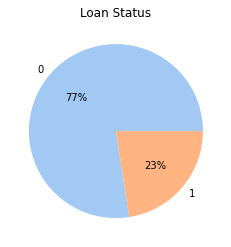

In [9]:
# create pie chart
# define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:2]
labels= df['loan_status'].value_counts().index

plt.pie(df['loan_status'].value_counts(),labels = labels, colors=colors,  autopct='%.0f%%')
plt.title('Loan Status')
plt.show();

### Loan interest rate  Disturbution

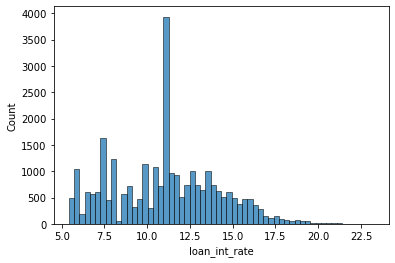

In [12]:
fig = sns.histplot(df.loan_int_rate)

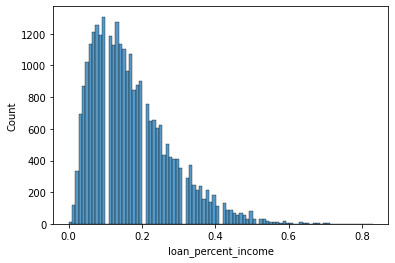

In [12]:
# TASK: Similar to above could please plot an histogram for the column 'loan_percent_income'
# you filter a column by using command 'df.loan_int_rate' or 'df["df.loan_int_rate"]'
fig = --

## 3. Model Training

### 3.1 Prepare data for training

In [13]:
# TASK: separating features and target variable 
# you can try using the same filtering method as above eg. df[['a','b','c']] for multiple columns 
# and "df['a']" for single column dataframe
X = --
y = --

### 3.2 Train and test split

Dividing the dataset into 2 dataframes:
1) Train df - 70 % of records

2) Train df - 20 % of the records

In [14]:
#TASK : Please split the whole data set into 70% for Train and 30% for Test
# please assign the value for test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=--, random_state=62, stratify=y)

In [15]:
# Printing the train and test dataframe dimensions
print("Target Training Data Shape:" , y_train.shape)
print("Target Test Data Shape:" , y_test.shape)
print("Variables Training Data Shape:" , X_train.shape)
print("Variable Test Data Shape:" , X_test.shape)

Target Training Data Shape: (19959,)
Target Test Data Shape: (8555,)
Variables Training Data Shape: (19959, 5)
Variable Test Data Shape: (8555, 5)


### 3.3 Loading the model

In [16]:
# initialising the random forest model from sklearn library
# TASK : please intialise a RandomForestClassifier with 1000 estimators  , max_depth of 4  
# and set random_state=7 
# Hint: please refer the below reference links on the model intialised , fitted and predicted.


# ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# if you are curious how to perform hyperparameter tuning: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

from sklearn.ensemble import RandomForestClassifier

forest = --

In [17]:
# TASK : Fitting the model on Train Data i.e "X_train", "y_train"
rf_model = --

In [18]:
# Making predictions
pred = rf_model.predict(X_test)

In [19]:
pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### 3.4 Feature importance 
Ref: https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e

In [20]:
Final_df = pd.DataFrame()

In [21]:
Final_df['columns'] = X_train.columns
Final_df['feature_importance'] = rf_model.feature_importances_

In [22]:
Final_df.sort_values('feature_importance', ascending=False)

,columns,feature_importance
0,loan_percent_income,0.357677
1,loan_grade,0.241564
3,person_home_ownership,0.152480
4,loan_int_rate,0.124349
2,person_income,0.123931


### 3.5 Checking the model quality 

Ref: https://towardsdatascience.com/metrics-to-evaluate-your-machine-learning-algorithm-f10ba6e38234

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    

In [24]:
# Train Metrics
# TASK : Just observe and enjoy
generate_model_report(y_test, pred)

Accuracy =  0.8893045002922267
Precision =  0.8402489626556017
Recall =  0.629207664422579
F1 Score =  0.7195735860230975


## 4. Exporting the Model

We save the model as a pickle file. The model can be then used on other machines.
- Ref: https://towardsdatascience.com/do-not-use-python-pickle-unless-you-know-all-these-facts-d9e8695b7d43

In [25]:
with open('rf_model.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(rf_model, f) 